- https://graph-tool.skewed.de/static/doc/centrality.html

In [1]:
import osmnx, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
osmnx.init(file_log=True, use_cache=True)

## Create a street network and then simplify it

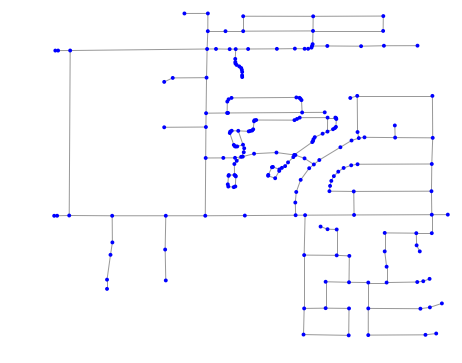

In [3]:
location_point = (33.299896, -111.831638)
G = osmnx.graph_from_point(location_point, distance=500, simplify=False)
fig, ax = osmnx.plot_graph(G, node_color='b', node_zorder=3)

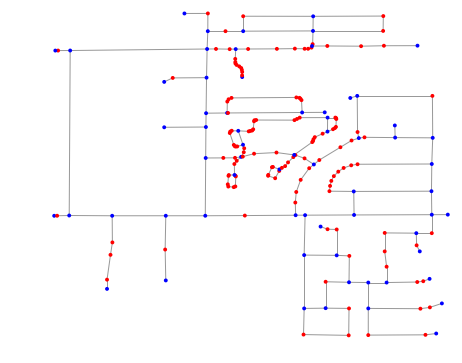

In [4]:
nc = ['r' if G.degree(node)==2 else 'b' for node in G.nodes()]
fig, ax = osmnx.plot_graph(G, node_color=nc, node_zorder=3)

In [5]:
G2 = G.copy()
G2 = osmnx.simplify_graph(G2)

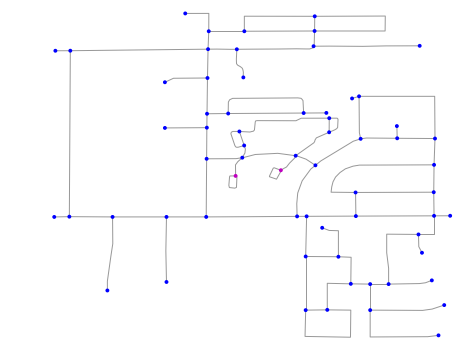

In [6]:
loops = [edge[0] for edge in G2.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G2.nodes()]
fig, ax = osmnx.plot_graph(G2, node_color=nc, node_zorder=3)

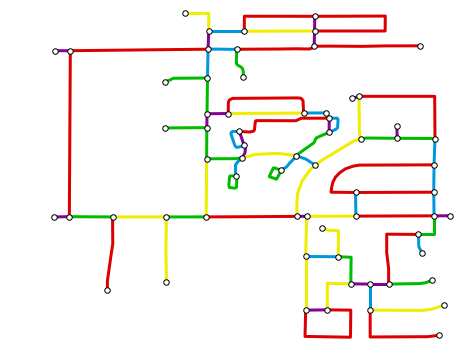

In [7]:
ec = osmnx.get_edge_colors_by_attr(G2, attr='length')
fig, ax = osmnx.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=30, node_zorder=3, edge_color=ec, edge_linewidth=3)

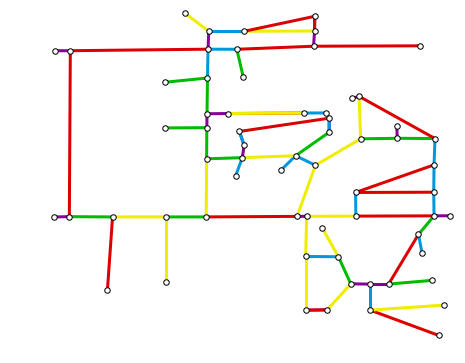

In [8]:
# plot same graph again (topologically isomorphic), this time ignoring the edges' spatial geometry
ec = osmnx.get_edge_colors_by_attr(G2, attr='length')
fig, ax = osmnx.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=30, node_zorder=3, 
                           edge_color=ec, edge_linewidth=3, edge_alpha=1, use_geom=False)

## Create a 'drivable' street network for downtown SF then simplify it

In [9]:
location_point = (37.791427, -122.410018)
G = osmnx.graph_from_point(location_point, distance=1500, network_type='motor', simplify=False)

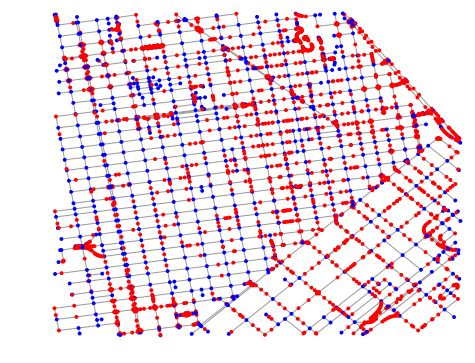

In [10]:
nc = ['r' if G.degree(node)==2 else 'b' for node in G.nodes()]
fig, ax = osmnx.plot_graph(G, node_color=nc, node_zorder=3)

In [11]:
G2 = G.copy()
G2 = osmnx.simplify_graph(G2)

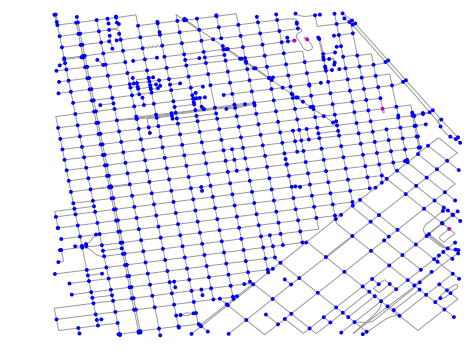

In [12]:
loops = [edge[0] for edge in G2.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G2.nodes()]
fig, ax = osmnx.plot_graph(G2, node_color=nc, node_zorder=3)

## Create another suburban street network, then simplify it

In [13]:
G = osmnx.graph_from_address('420 North Corsica Place, Chandler, Arizona', 
                             distance=800, network_type='motor', simplify=False)

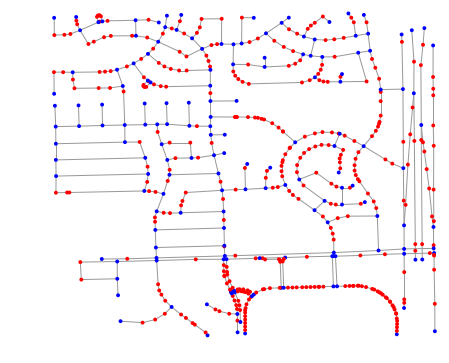

In [14]:
nc = ['r' if G.degree(node)==2 else 'b' for node in G.nodes()]
fig, ax = osmnx.plot_graph(G, node_color=nc, node_zorder=3)

In [15]:
G2 = G.copy()
G2 = osmnx.simplify_graph(G2)

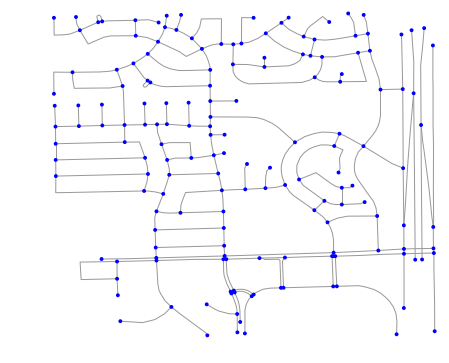

In [16]:
loops = [edge[0] for edge in G2.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G2.nodes()]
fig, ax = osmnx.plot_graph(G2, node_color=nc, node_zorder=3)

## Create a drivable street network for all of Oakland then simplify it

In [17]:
G = osmnx.graph_from_place('Oakland, California, USA', network_type='motor', simplify=False)

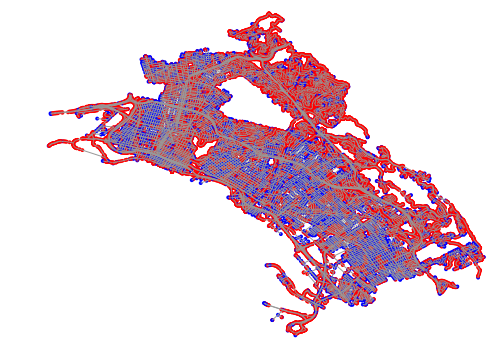

In [18]:
nc = ['r' if G.degree(node)==2 else 'b' for node in G.nodes()]
fig, ax = osmnx.plot_graph(G, node_color=nc)

In [19]:
G2 = G.copy()
G2 = osmnx.simplify_graph(G2)

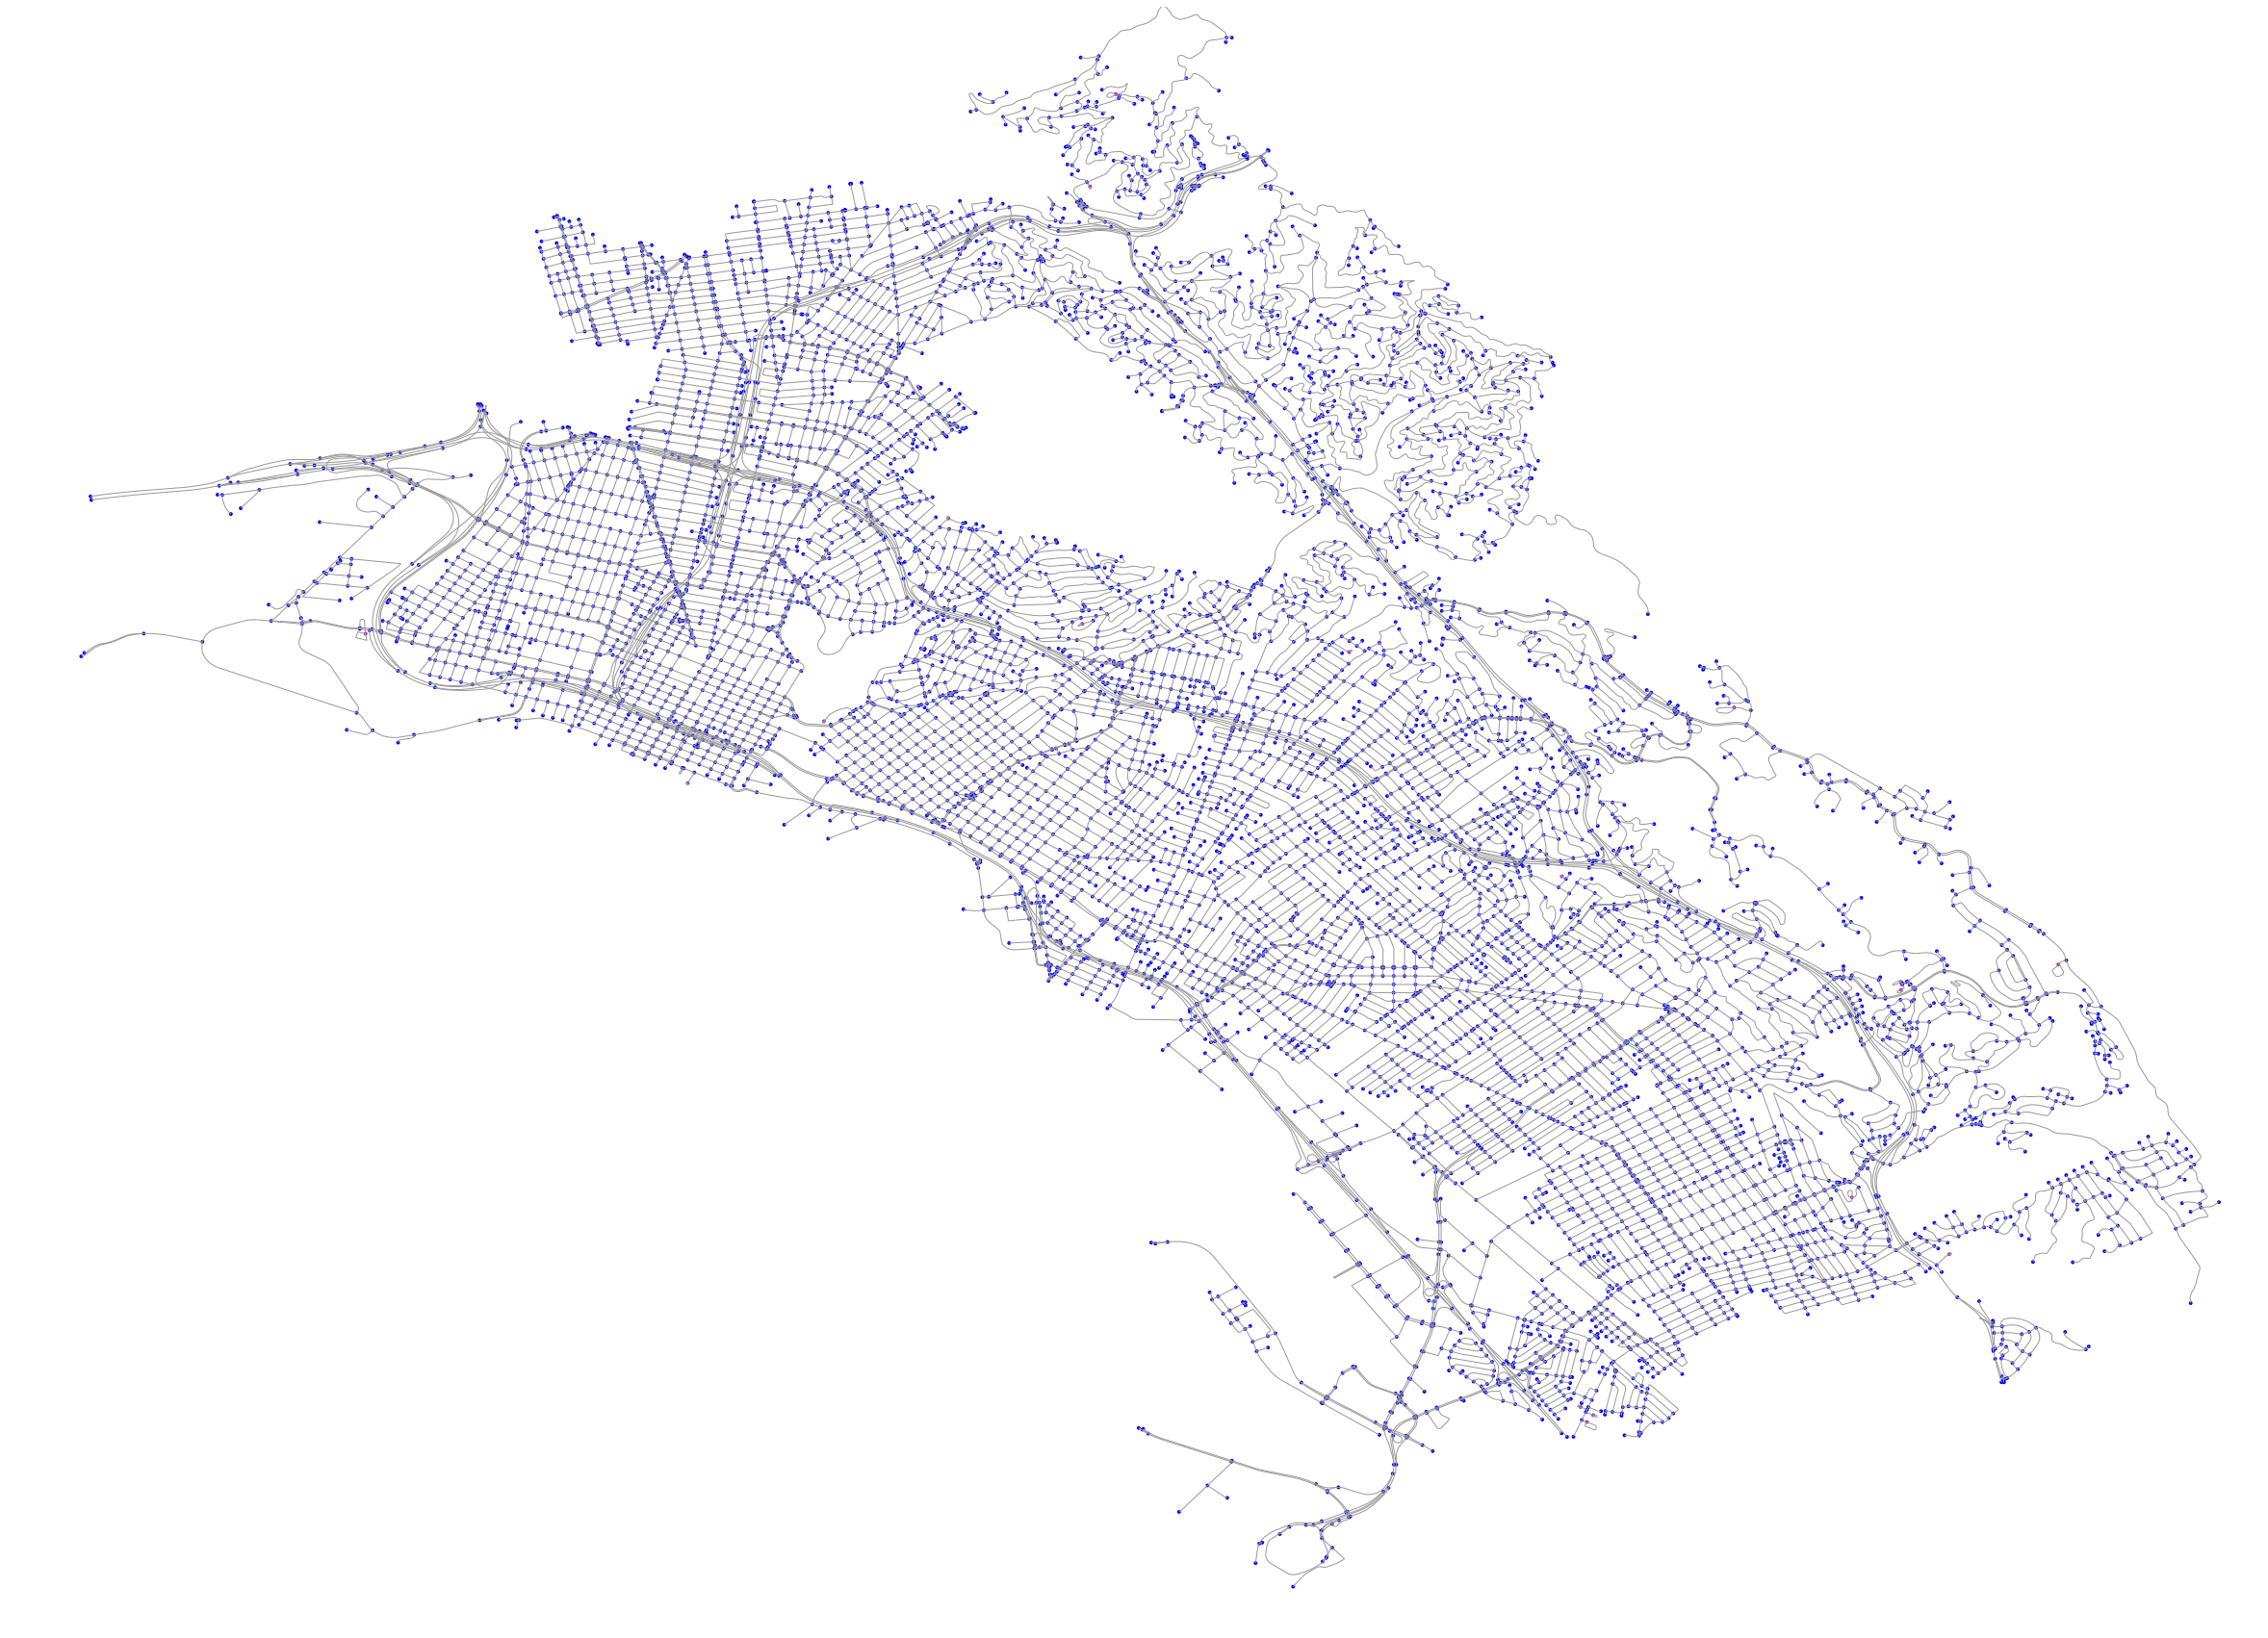

In [20]:
loops = [edge[0] for edge in G2.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G2.nodes()]
fig, ax = osmnx.plot_graph(G2, fig_height=30, node_color=nc, save=True, filename='oak-motor.jpg')

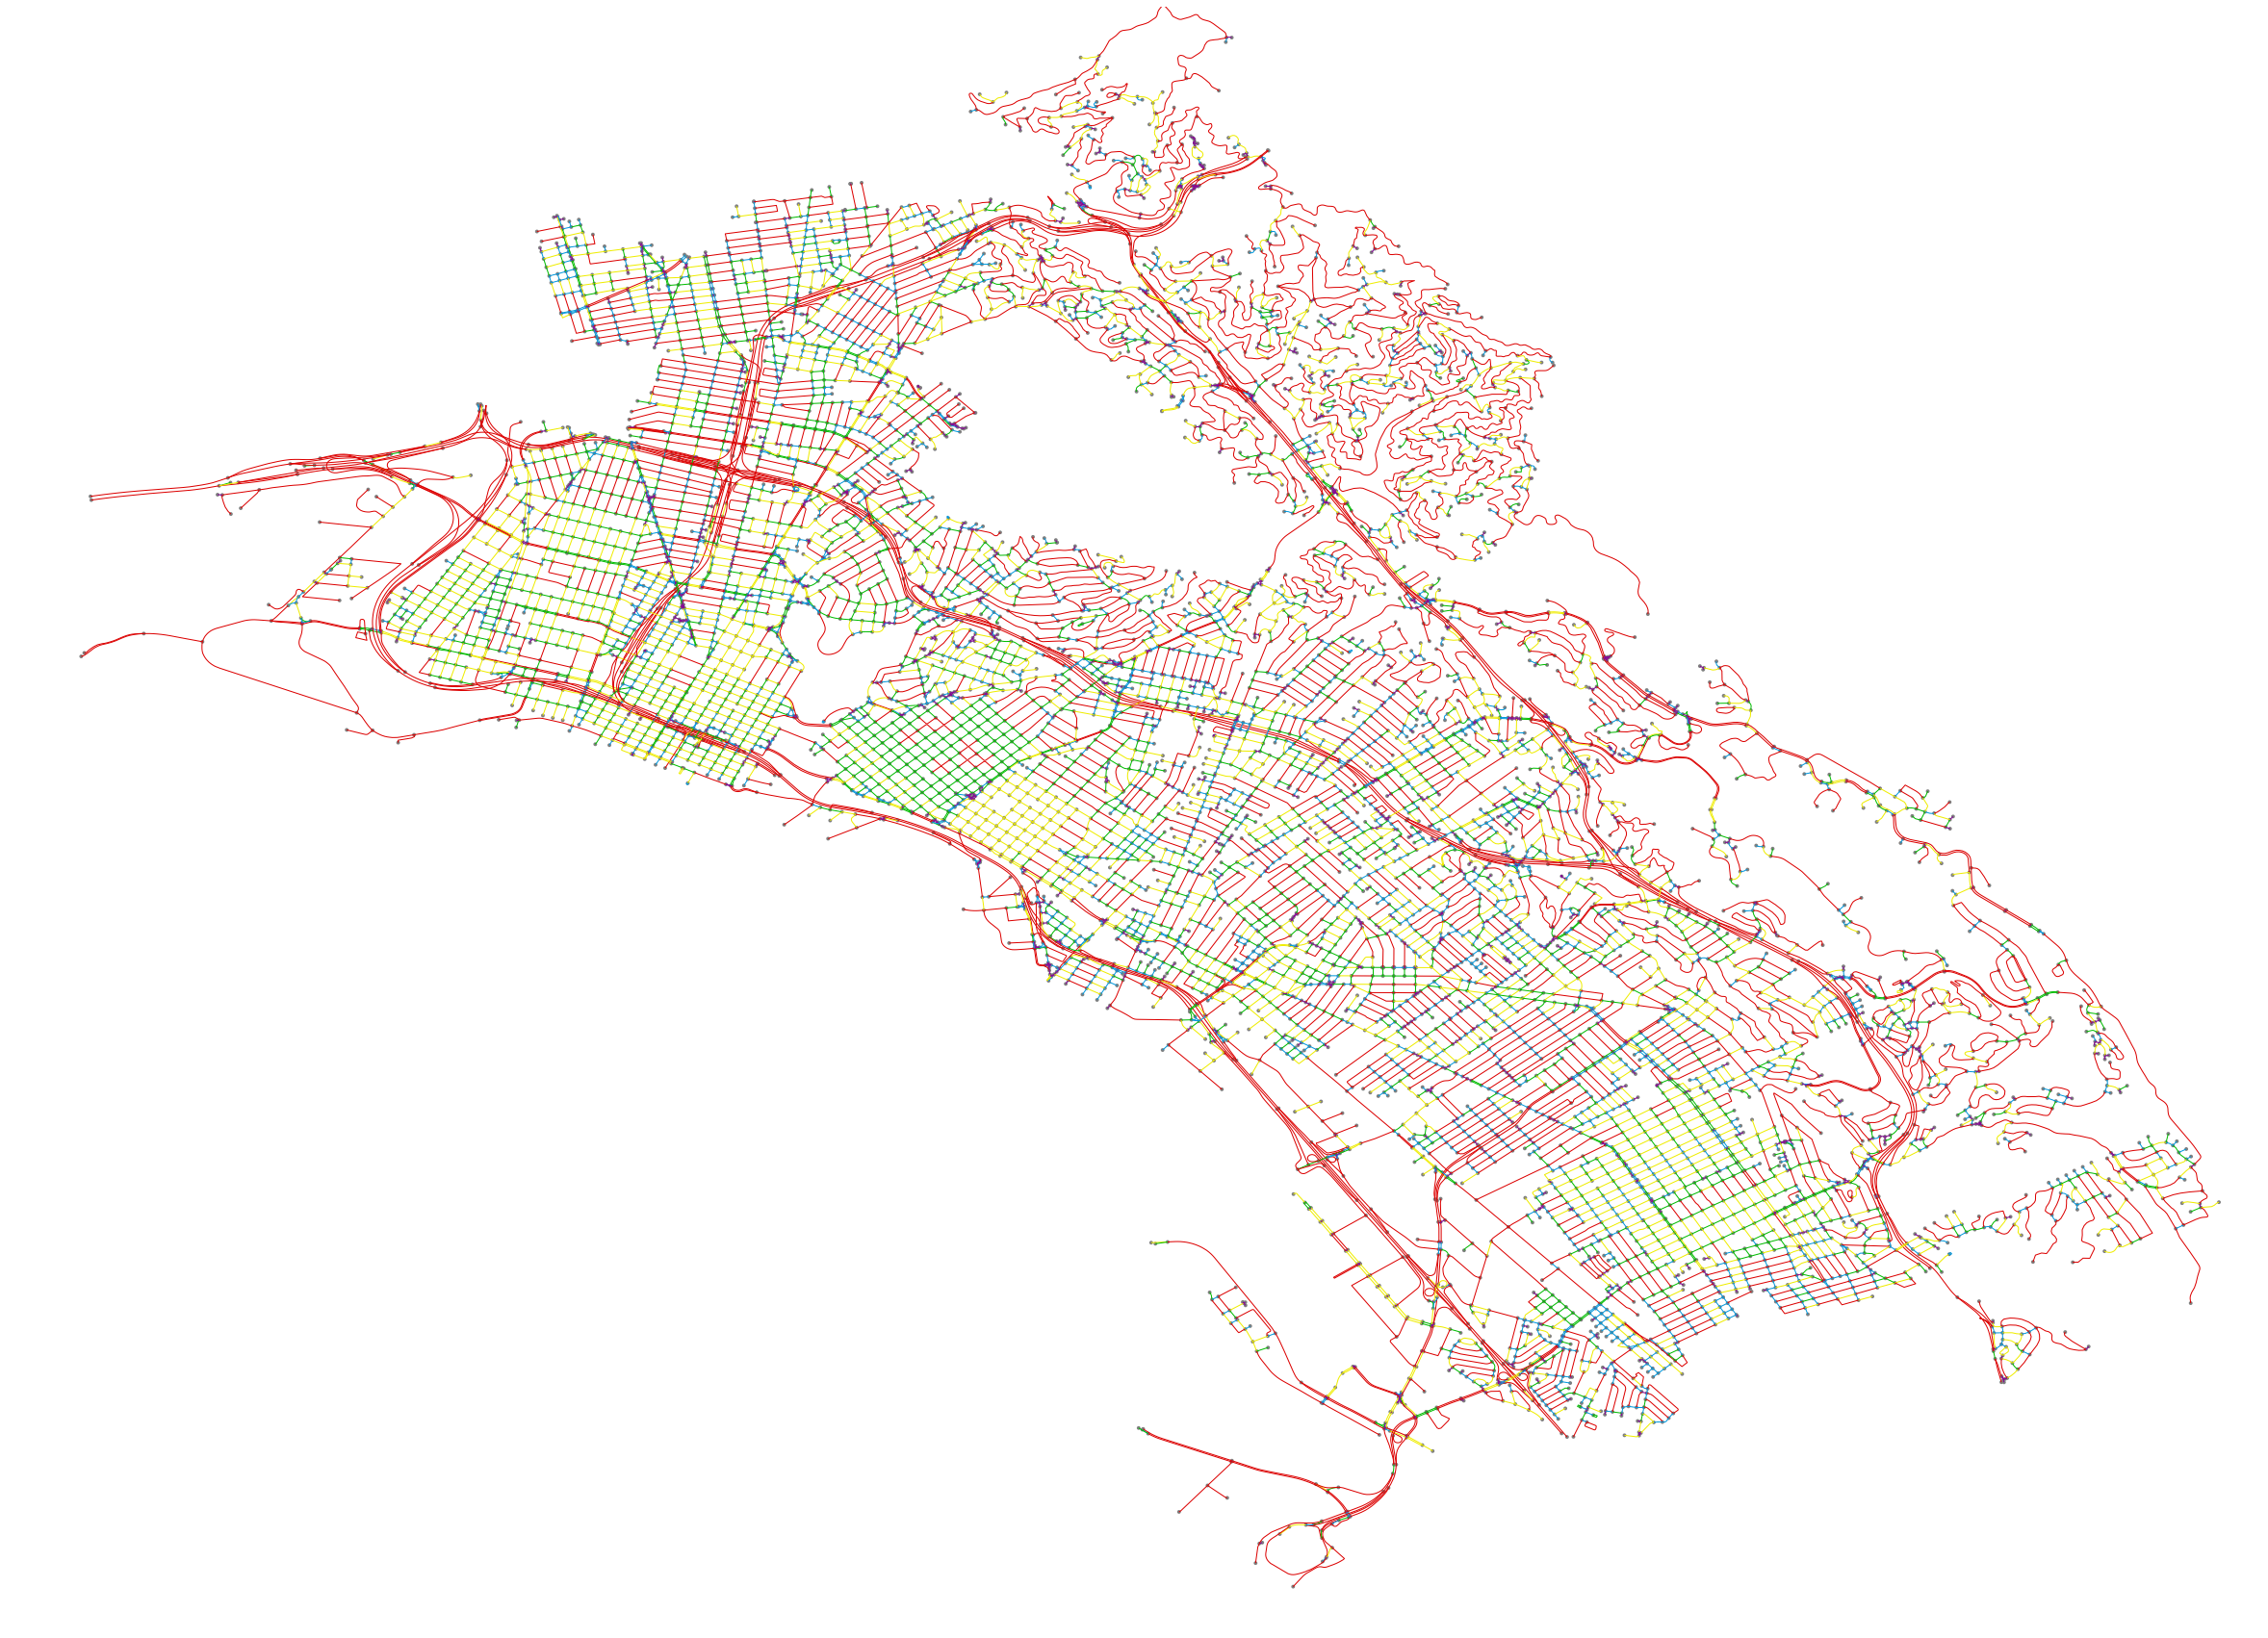

In [21]:
ec = osmnx.get_edge_colors_by_attr(G2, attr='length')
fig, ax = osmnx.plot_graph(G2, fig_height=30, node_color='gray', edge_color=ec, save=True, filename='oak-color.jpg')

## Create the street network for old town Venice and visualize it

In [22]:
# bounding box around the islands of old town venice
north = 45.449654
south = 45.421829
east = 12.367387
west = 12.301383
G = osmnx.graph_from_bbox(north, south, east, west)

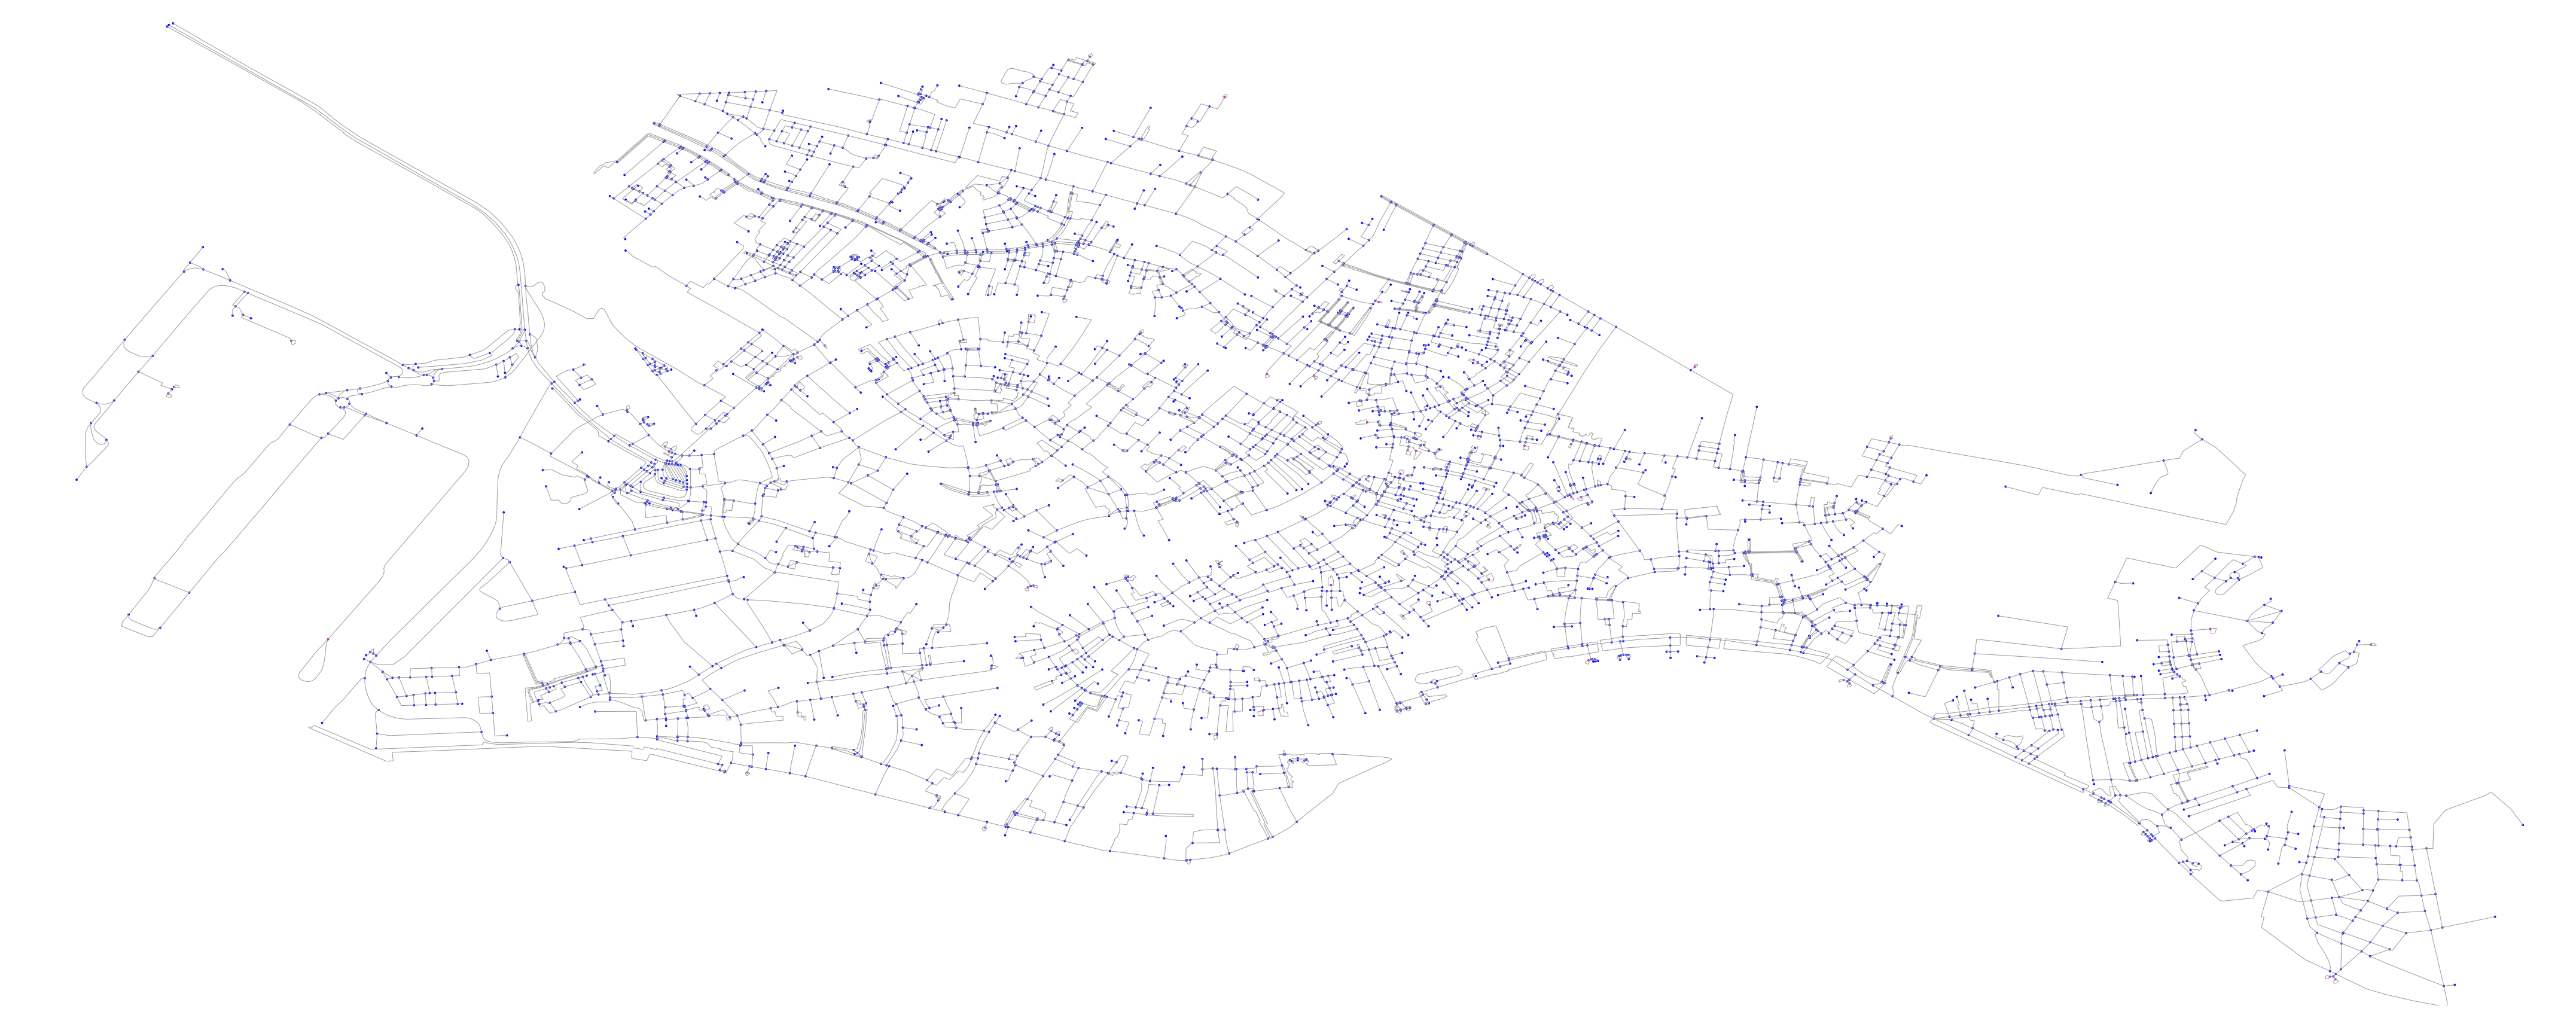

In [23]:
loops = [edge[0] for edge in G.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G.nodes()]
fig, ax = osmnx.plot_graph(G, fig_height=30, node_color=nc, save=True, filename='venice.jpg')

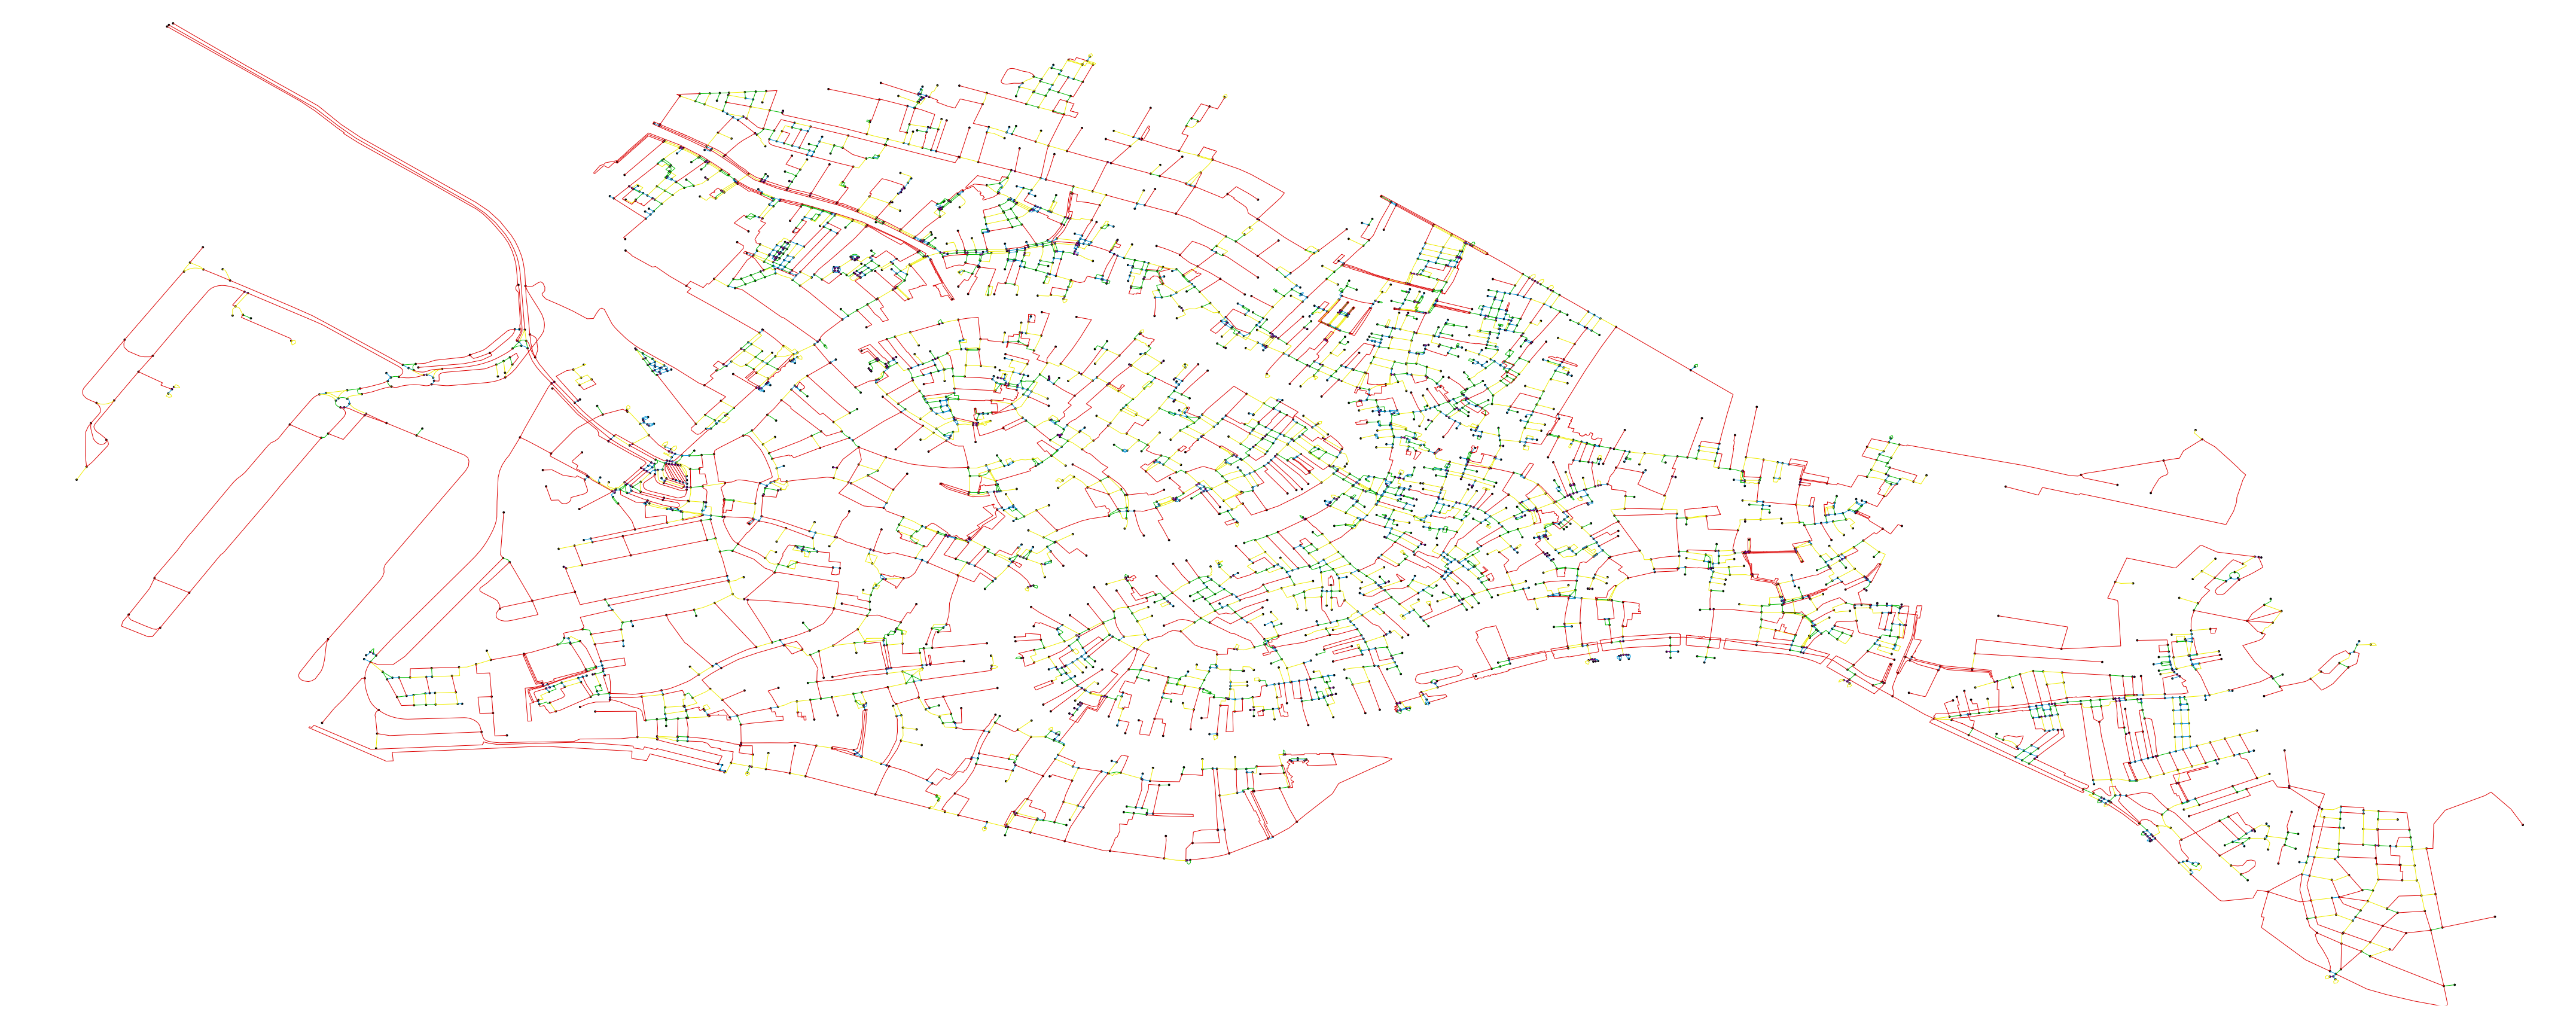

In [24]:
ec = osmnx.get_edge_colors_by_attr(G, attr='length')
fig, ax = osmnx.plot_graph(G, fig_height=30, node_color='k', edge_color=ec, edge_linewidth=1, 
                           save=True, filename='venice-color.jpg')

## Demonstrate handling simplification in disconnected subgraphs

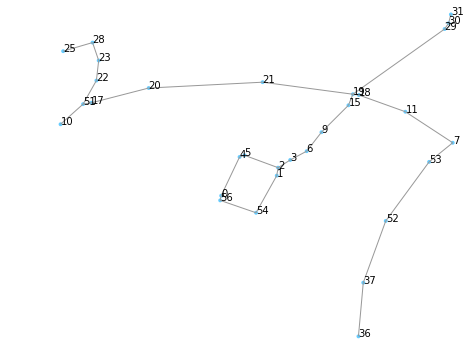

In [25]:
G = osmnx.graph_from_point((33.3001, -111.83096), distance=100, simplify=False)
fig, ax = osmnx.plot_graph(G, annotate=True)

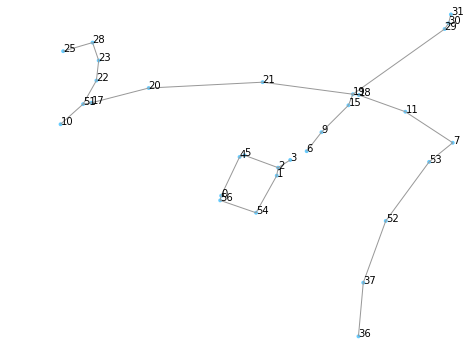

In [26]:
# remove the edge connecting nodes 3 and 6
G2 = G.copy()
G2.remove_edge(3,6)
fig, ax = osmnx.plot_graph(G2, annotate=True)

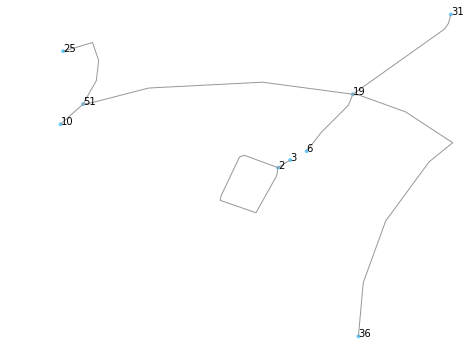

In [27]:
# simplify the disconnected graph - it all works fine
G3 = osmnx.simplify_graph(G2)
fig, ax = osmnx.plot_graph(G3, annotate=True)

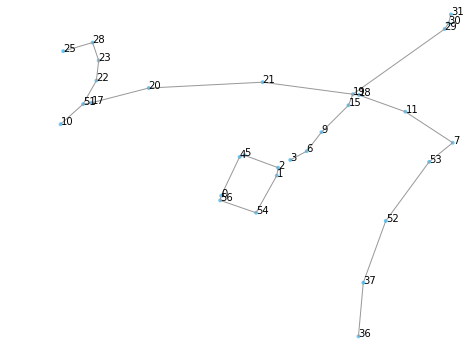

In [28]:
# start over and this time remove the edge connecting nodes 2 and 3
G2 = G.copy()
G2.remove_edge(2,3)
fig, ax = osmnx.plot_graph(G2, annotate=True)

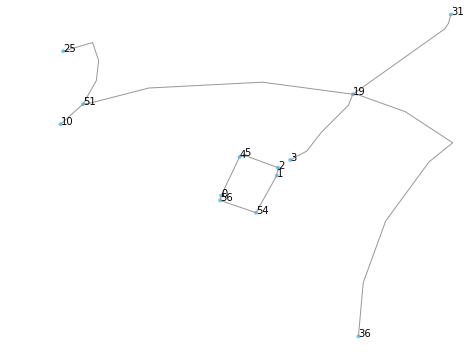

In [29]:
G3 = osmnx.simplify_graph(G2)
fig, ax = osmnx.plot_graph(G3, annotate=True)

The simplification process succeeds, but does not simplify the topology of the ring subgraph. You cannot simplify this subgraph because it is a loop in which all nodes have degree 2.